# Naive Baeyes Algorithm
It is a very simple classificiation based on **Baeyes Theorem**.
Assumptions:
- ### IID:
It states that all the features which are used in classification are independent and identical from each other.
    - **Independent**: This means that each feature is purely independent of each other and one does not effect another.
    - **Identical**: This means that we are assuming that each of the feature is obtained from the same distribution , in this case Mullitvariate Gaussian.
#### Baeyes Theorem:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
For machine learning , naive baeyes can be written as :
$$P(class|data) = \frac{P(data|class)P(class)}{P(data)}$$
- P(class) : Prior Probability , it is the probability of class in the given dataset.
- P(data): Total probability 
- P(data|clas) : Likelihood Probability , probability of class having a given data value associated to it.
- P(class| data) : Posterior Probability , probability of data having a particular class

![](https://i.ytimg.com/vi/eho8xH3E6mE/hqdefault.jpg)

In [134]:
import numpy as np
import pandas as pd 
import scipy.stats as s
import seaborn as sns
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt

In [113]:
raw_data = pd.read_csv("D:\Document\Machine_Learning\Iris\Iris.csv")

In [114]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
raw_data.shape

(150, 6)

In [116]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [117]:
raw_data.drop(['Species'],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [150]:
class PrepareData:
    def __init__(self,data):
        self.data = data
        self.class_labels = None
        self.c0_raw_data = None
        self.c1_raw_data = None
        self.c2_raw_data = None
        self.c0_train = None
        self.c0_test = None
        self.c1_train = None
        self.c1_test = None
        self.c2_train = None
        self.c2_test =None 
        self.train_data = None
        self.train_labels= None
        self.test_data = None
        self.test_labels = None
    def class_separation(self):
        '''
        Separates the data into data for each class
        '''
        self.class_labels = self.data['Species'].unique()
        self.c0_raw_data = self.data[self.data['Species']==self.class_labels[0]]
        self.c1_raw_data = self.data[self.data['Species']==self.class_labels[1]]
        self.c2_raw_data = self.data[self.data['Species']==self.class_labels[2]]
        
    def train_test_split(self):
        '''
        This function first divides the data of each class into train data and test data
        Then concatenates a different class data into train_data and test_data.
        It also preapres train_labels and test_labels.
        
        Returns :
        train_data -> training dataset with both positive and negative class data
        train_labels -> training labels with the "B" , "M" replaced with "False" and "True"
        test data -> test dataset with positive and negative class data.
        test_labels - test labels with the "B" , "M" replaced with "False" and "True"
        '''
        self.class_separation()
        train_data_len = int(0.7*self.data.shape[0])
        class_data_len = train_data_len//3

        self.c0_train = self.c0_raw_data.iloc[0:class_data_len]
        self.c0_test = self.c0_raw_data.iloc[class_data_len:]
        self.c1_train = self.c1_raw_data.iloc[0:class_data_len]
        self.c1_test = self.c1_raw_data.iloc[class_data_len:]
        self.c2_train = self.c2_raw_data.iloc[0:class_data_len]
        self.c2_test= self.c2_raw_data.iloc[class_data_len:]

        self.train_data = pd.concat([self.c0_train,self.c1_train,self.c2_train])
        self.test_data = pd.concat([self.c0_test,self.c1_test,self.c2_test])
        self.train_labels = self.train_data['Species']
        self.train_data.replace(to_replace=self.class_labels , value= [ 0,1,2] , inplace= True)
        self.train_data.drop('Species',axis=1,inplace=True)
        self.train_data.drop('Id' , axis=1 , inplace=True)
        self.test_labels = self.test_data['Species']
        self.test_data.replace(to_replace=self.class_labels , value= [ 0,1,2] , inplace= True)
        self.test_data.drop('Species',axis=1,inplace=True)
        self.test_data.drop('Id',axis=1,inplace=True)
        return self.train_data , self.train_labels,self.test_data,self.test_labels

In [119]:
raw_data_copy = raw_data

In [120]:
data = PrepareData(raw_data_copy)

In [121]:
train_data, train_labels ,test_data, test_labels = data.train_test_split()

In [122]:
train_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
130,7.4,2.8,6.1,1.9
131,7.9,3.8,6.4,2.0
132,6.4,2.8,5.6,2.2
133,6.3,2.8,5.1,1.5


In [130]:
px.histogram(data_frame=train_data , x = "SepalLengthCm",title="SepalLength")

In [131]:
px.histogram(data_frame=train_data , x = "SepalWidthCm",title="SepalWidth")

In [132]:
px.histogram(data_frame=train_data , x = "PetalLengthCm",title="PetalLength")

In [133]:
px.histogram(data_frame=train_data , x = "PetalWidthCm",title="PetalWidth")

### Petal width is not normally distributed hence we do not consider it.

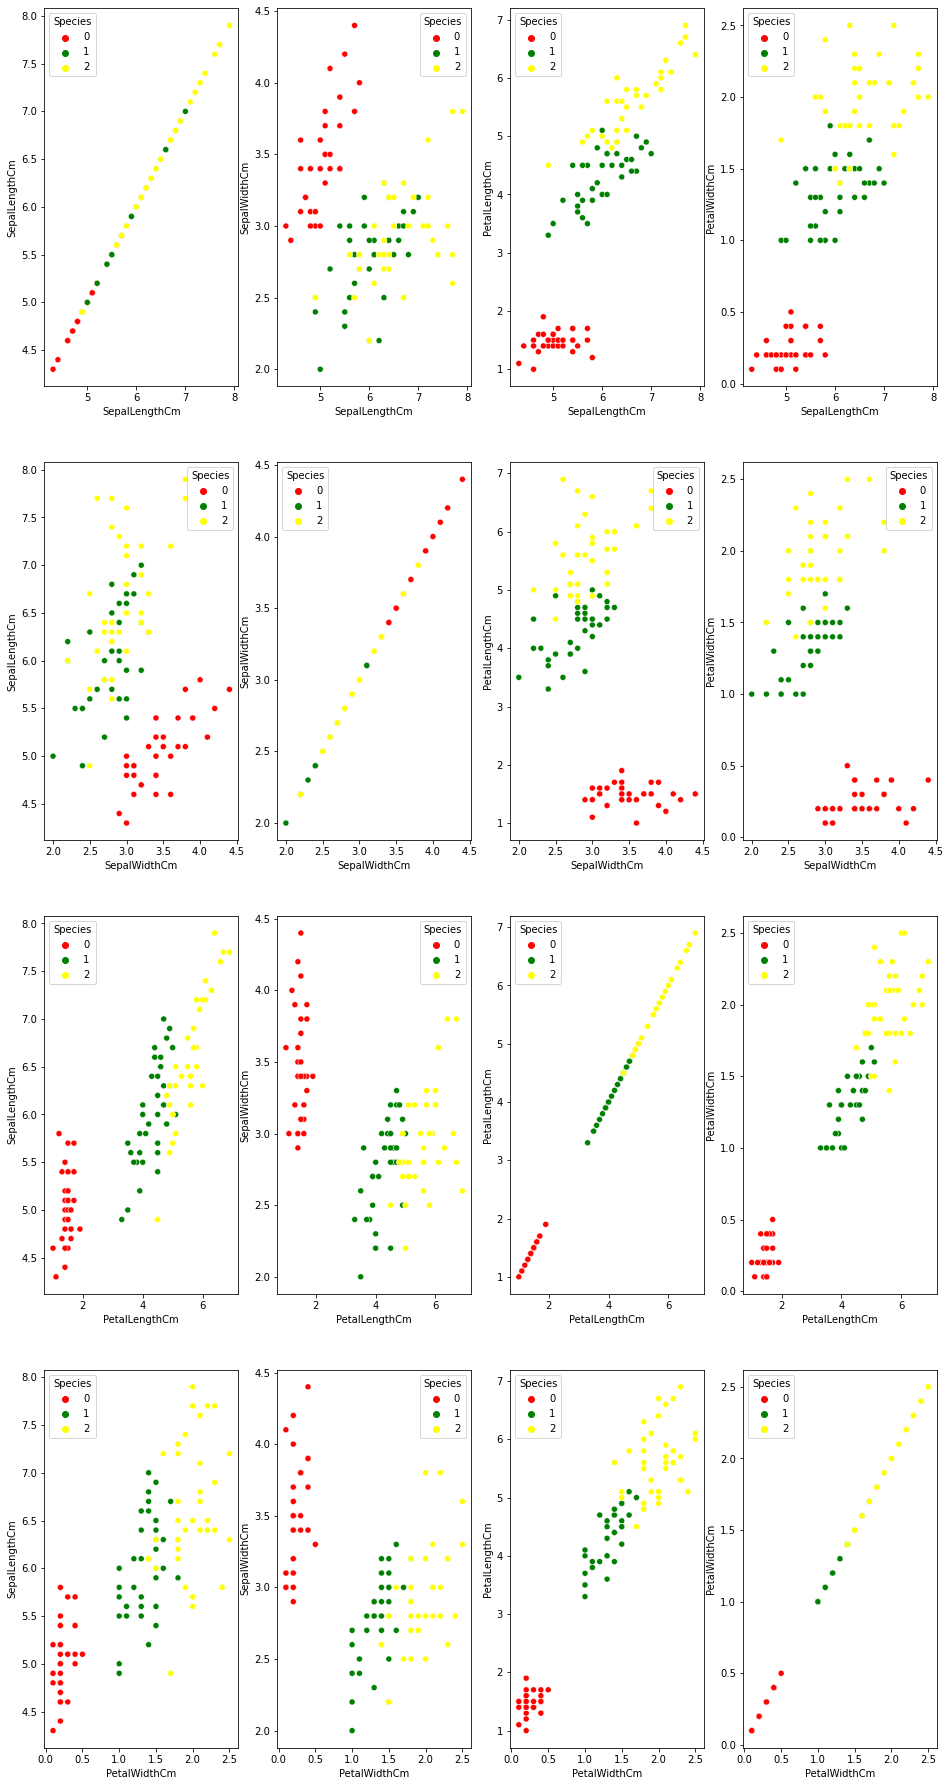

In [148]:
color_dict = {
    0: "red",
    1 : "green",
    2: "yellow"
}
fig,ax = plt.subplots(4,4,figsize=(16,32))
for i in range(0,len(train_data.columns)):
    for j in range(0,len(train_data.columns)):
        sns.scatterplot(x=train_data[train_data.columns[i]],y=train_data[train_data.columns[j]],data=train_data,hue=train_labels,palette=color_dict,ax=ax[i][j])

#### We can check how the various features are related to each other

In [149]:
class NaiveBaeyesClassifier:
    def __init__(self,train_data, train_labels ,test_data, test_labels):
        self.train_data = train_data
        self.train_labels= train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.prior_prob = self.train_data[self.train_labels== 0].shape[0] / self.train_data.shape[0]
        self.mu_0 = None
        self.mu_1 = None
        self.mu_2 = None
        self.cov_0 = None
        self.cov_1 = None
        self.cov_2 = None
        self.likeli_0 = None
        self.likeli_1 = None
        self.likeli_2 = None
        self.total_prob = None
        self.posterior_probability = None
        self.accu = None
    def cov_mats(self):
        '''
        Calculate the MVU estimates for Normal Distribution i.e., mean(mu) and covariance matrix(for multivariate joint gaussian)
        It calculates the mean and covariance for both positive and negative class separetely
        '''
        self.mu_0 = self.train_data[self.train_labels == 0].iloc[:,:3].mean()
        self.mu_1 = self.train_data[self.train_labels == 1].iloc[:,:3].mean()
        self.mu_2 = self.train_data[self.train_labels == 2].iloc[:,:3].mean()

        self.cov_0 = self.train_data[self.train_labels == 0].iloc[:,:3].cov()
        self.cov_1 = self.train_data[self.train_labels == 1].iloc[:,:3].cov()
        self.cov_2 = self.train_data[self.train_labels == 2].iloc[:,:3].cov()
        if np.linalg.det(self.cov_0) == 0 or np.linalg.det(self.cov_1) == 0 or np.linalg.det(self.cov_2) == 0:
            print("Covariance Matrix is not inversible , hence cannot calculate likeli hood probability")
    def likelihood_prob(self):
        '''
        Calculates the likelihood probabilities for both train and test data with positive and negative classes seprarately
        '''
        self.cov_mats()
        self.likeli_0 = s.multivariate_normal.pdf(self.test_data.iloc[:,:3],self.mu_0,self.cov_0)
        self.likeli_1 = s.multivariate_normal.pdf(self.test_data.iloc[:,:3],self.mu_1,self.cov_1)
        self.likeli_2 = s.multivariate_normal.pdf(self.test_data.iloc[:,:3],self.mu_2,self.cov_2)
    def posterior_prob(self):
        '''
        Posterior probailites for both the test and train data for positive class 
        '''
        self.likelihood_prob()
        self.total_prob = self.likeli_0 + self.likeli_1 + self.likeli_2
        posterior_0 = self.likeli_0/self.total_prob
        posterior_1 = self.likeli_1/self.total_prob
        posterior_2 = self.likeli_2/self.total_prob
        posterior_0 = posterior_0.reshape(self.test_labels.shape[0],1)
        posterior_1 = posterior_1.reshape(self.test_labels.shape[0],1)
        posterior_2 = posterior_2.reshape(self.test_labels.shape[0],1)
        self.posterior_probability = np.concatenate([posterior_0,posterior_1,posterior_2],axis=1)
    def accuracy(self):
        '''
        Using posterior probability to calculate boolean mask and hence calculate the test accuracy for the algorithm
        Return :
        train_accuracy -> Accuracy of algorithm on train data
        test_accuracy -> Accuracy of algorithm on test data 
        '''
        self.posterior_prob()
        predicted_labels = np.argmax(self.posterior_probability,axis=1) 
        boolean_mask = (predicted_labels == self.test_labels)
        correct_count = (np.sum(boolean_mask/self.test_data.shape[0]))
        self.accu = correct_count * 100
        return f"Test Accuracy : {self.accu}"

In [151]:
model = NaiveBaeyesClassifier(train_data, train_labels ,test_data, test_labels)

In [152]:
model.accuracy()

'Test Accuracy : 93.33333333333336'